# Multi-Armed Bandit Line Jump

In this notebook, we test our knowledge of multi-armed bandits on the a line wark problem. The formulation of a line walk problem is as follows:
- We have a line scaled from 0 to $\texttt{max\_scale}$.
- We set sample random two variables $\texttt{agent\_position}$ and $\texttt{goal}$ in the line scale. These are:
    - $\texttt{agent\_position}$: our agent position
    - $\texttt{goal}$: our goal position
- We can perfom a jump from a set of n jumps which basically determines how the agent towards to the goal.
- Objective: Find the jump to makes the agent reach the goal (or at least be the closest possible).

### Import

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(int(time.time()))
%matplotlib inline

## Environment

We start by creating the environment which is a fairly simple one.
- We generate the goal and the agent position
- Our reward at a given time step is given by:

$$ P_t = \frac{1}{|\texttt{agent\_positon}_t - \texttt{goal}| + 1}$$

$$

R_t = X \sim \mathrm{Bern}(P_t)
$$

In [2]:
from rl_lab.environments.bandits import LineWalkEnvironment

## Agent

- The only information our greedy agent has is:
    - The set of actions it can perform.
    - The expected gain of each action along over time.
- We update our expected reward for each action according to the following formula.

$$
Q_t(a)=\frac{R_1+R_2+\cdots+R_{N_t(a)}}{N_t(a)}
$$

- To compute it recursively, we use the following formula.

$$
Q_t(a)= Q_{t - 1}(a)+ \frac{1}{N_t(a)} (R_{N_t(a)} - Q_{t - 1}(a))
$$

You can check th code for the used agent at []()

In [3]:
from rl_lab.agents.bandits import GreedyBandit

## Training

Now, let us create the function that runs the different experiments and returns the metrics of interest to compare different methods. We implement these experiments such that $10^{th}$ action is always the best action.

In [4]:
from rl_lab.runners import run_bandits_experiments

The next steps is to run a simulation with different approach to solving the multi-armed bandit problem. These approaches are:
    
- Greedy Solution (only select best action)
- $\epsilon$-greedy (select best action with probability 1 - $\epsilon$)
- The same previous methods but we constant step size instead of the using the reciprocal of the number of times the action for which we obtained a reward was taken.

In [5]:
num_actions = 10
line_length = 256
timesteps = 1000
num_experiments = 100

specs = {
    "$\epsilon=0.1$": {"agent": GreedyBandit, "params": {"epsilon": 0.1}, "color": "black"},
    "$\epsilon=0.01$": {"agent": GreedyBandit, "params": {"epsilon": 0.01}, "color": "red"},
    "$\epsilon=0$ (greedy)": {
        "agent": GreedyBandit,
        "params": {"epsilon": 0.0},
        "color": "green",
    },
    "$\epsilon=0.1$ (constant)": {
        "agent": GreedyBandit,
        "params": {"epsilon": 0.1, "has_constant_step": True},
        "color": "blue",
    },
    "$\epsilon=0.01$ (constant)": {
        "agent": GreedyBandit,
        "params": {"epsilon": 0.01, "has_constant_step": True},
        "color": "brown",
    },
    "$\epsilon=0$ (greedy,constant)": {
        "agent": GreedyBandit,
        "params": {"epsilon": 0.0, "has_constant_step": True},
        "color": "grey",
    },
}

results = run_bandits_experiments(
    specs, LineWalkEnvironment, timesteps, num_actions, num_experiments, line_length
)

Now we will plot different experiments.

In [6]:
from rl_lab.plotters import plot_lines, plot_bars

<AxesSubplot: title={'center': 'Average reward (per actions) over 100 experiments'}, xlabel='Actions', ylabel='Average Reward'>

<Figure size 640x480 with 0 Axes>

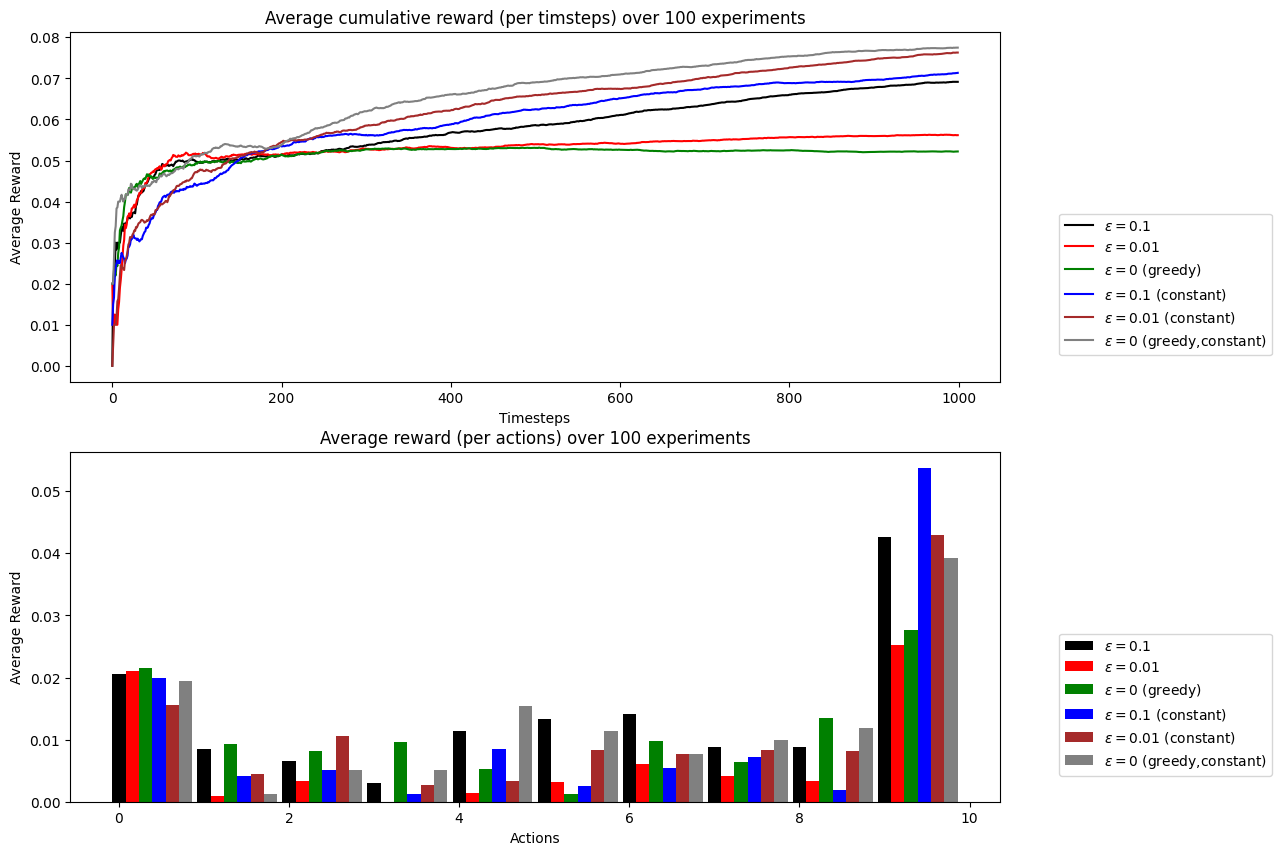

In [7]:
plt.tight_layout(pad=20.0)

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# average reward per timesteps
plot_lines(
    ax[0],
    results,
    x_values=range(timesteps),
    y_key="timesteps_reward",
    title=f"Average cumulative reward (per timsteps) over {num_experiments} experiments",
    x_label="Timesteps",
    y_label="Average Reward",
)

# Average reward expectation of the model per timesteps
plot_bars(
    ax[1],
    results,
    bins=np.linspace(0, num_actions - 1, num_actions),
    y_key="actions_reward",
    title=f"Average reward (per actions) over {num_experiments} experiments",
    x_label="Actions",
    y_label="Average Reward",
)

Now let us look at UCB bandits the adds an uncertainty value to the expected reward. As a result, the selected action is based on the formula below:

$$
A_t=\underset{a}{\arg \max }\left[Q_t(a)+c \sqrt{\frac{\ln t}{N_t(a)}}\right] \text {, }
$$

The $c$ parameter influences the confidence level because it controls how much uncertainty we allow to influence our choice of the best action.

In [8]:
from rl_lab.agents.bandits import UCBBandits

In [9]:
another_specs = {
    "$c=0.1$": {"agent": UCBBandits, "params": {"confidence_level": 0.1}, "color": "black"},
    "$c=0.5$": {"agent": UCBBandits, "params": {"confidence_level": 0.5}, "color": "red"},
    "$c=1.0$": {"agent": UCBBandits, "params": {"confidence_level": 1.0}, "color": "green"},
}

another_results = run_bandits_experiments(
    another_specs, LineWalkEnvironment, timesteps, num_actions, num_experiments, line_length
)

<AxesSubplot: title={'center': 'Average reward (per actions) over 100 experiments'}, xlabel='Actions', ylabel='Average Reward'>

<Figure size 640x480 with 0 Axes>

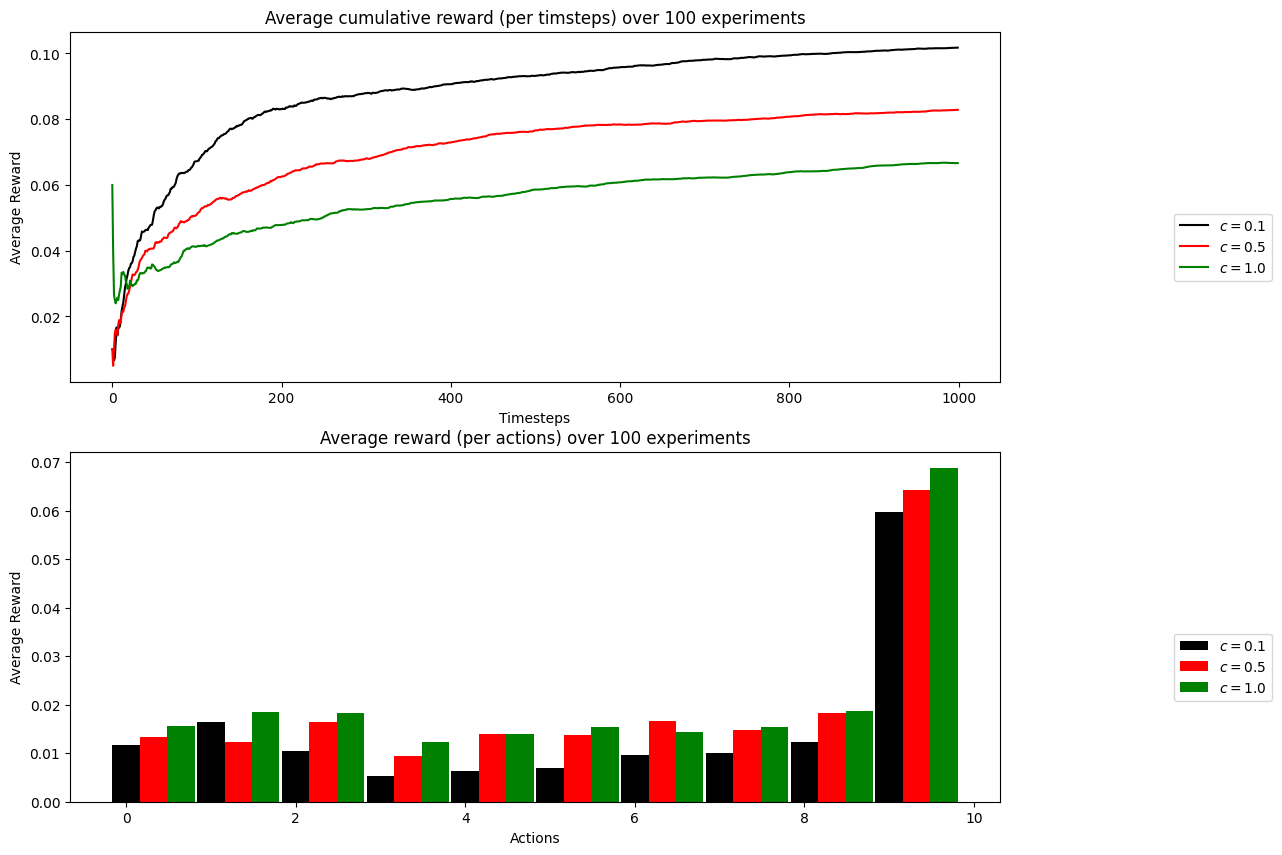

In [10]:
plt.tight_layout(pad=20.0)

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# average reward per timesteps
plot_lines(
    ax[0],
    another_results,
    x_values=range(timesteps),
    y_key="timesteps_reward",
    title=f"Average cumulative reward (per timsteps) over {num_experiments} experiments",
    x_label="Timesteps",
    y_label="Average Reward",
)

# Average reward expectation of the model per timesteps
plot_bars(
    ax[1],
    another_results,
    bins=np.linspace(0, num_actions - 1, num_actions),
    y_key="actions_reward",
    title=f"Average reward (per actions) over {num_experiments} experiments",
    x_label="Actions",
    y_label="Average Reward",
)

As you can observe, UCB outperforms the greedy method when the $c$ parameter is low enough. A reason while a high $c$ parameter might not be beneficial for out agent is because this introduces a high amount of uncertainty (the second), in our model. Nevertheless, the results are stil competitive with their greedy counterpart.